In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("sales.csv")
df

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-20,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-20,Evening,TAS,Kids,15,37500
7557,30-Dec-20,Evening,TAS,Men,15,37500
7558,30-Dec-20,Evening,TAS,Women,11,27500


In [5]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [8]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [9]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [10]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [12]:
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Unit'].fillna(df['Unit'].median(), inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Group'].fillna(df['Group'].mode()[0], inplace=True)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Sales_Norm','Unit_Norm']] = scaler.fit_transform(df[['Sales','Unit']])
df.head()


,Date,Time,State,Group,Unit,Sales,Sales_Norm,Unit_Norm
0,01-Oct-20,Morning,WA,Kids,8,20000,0.095238,0.095238
1,01-Oct-20,Morning,WA,Men,8,20000,0.095238,0.095238
2,01-Oct-20,Morning,WA,Women,4,10000,0.031746,0.031746
3,01-Oct-20,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,01-Oct-20,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [14]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales


,State,Sales
0,NSW,74970000
1,NT,22580000
2,QLD,33417500
3,SA,58857500
4,TAS,22760000
5,VIC,105565000
6,WA,22152500


In [15]:
df[['Sales','Unit']].describe()


,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


In [16]:
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]
std_sales = df['Sales'].std()


In [17]:
group_sales = df.groupby('Group')['Sales'].sum().reset_index()

highest_group = group_sales.loc[group_sales['Sales'].idxmax()]
lowest_group = group_sales.loc[group_sales['Sales'].idxmin()]


In [18]:
highest_state = state_sales.loc[state_sales['Sales'].idxmax()]
lowest_state = state_sales.loc[state_sales['Sales'].idxmin()]


In [19]:
highest_group

Group         Men
Sales    85750000
Name: 1, dtype: object

In [20]:
highest_state

State          VIC
Sales    105565000
Name: 5, dtype: object

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

weekly_sales = df.resample('W', on='Date')['Sales'].sum()
monthly_sales = df.resample('M', on='Date')['Sales'].sum()
quarterly_sales = df.resample('Q', on='Date')['Sales'].sum()


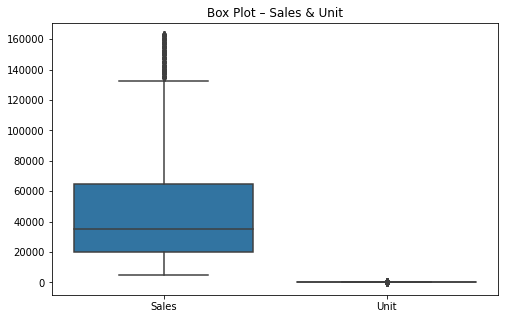

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Sales','Unit']])
plt.title("Box Plot – Sales & Unit")
plt.show()


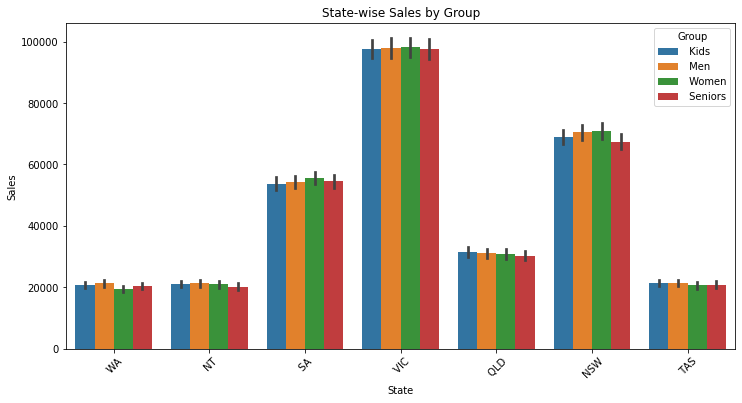

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title("State-wise Sales by Group")
plt.xticks(rotation=45)
plt.show()


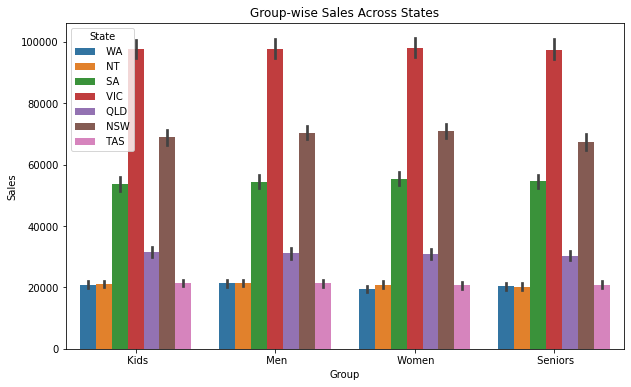

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Group', y='Sales', hue='State', data=df)
plt.title("Group-wise Sales Across States")
plt.show()


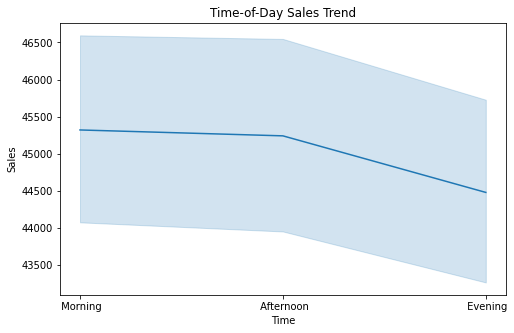

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Time', y='Sales', data=df)
plt.title("Time-of-Day Sales Trend")
plt.show()
